In [24]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np 
import pickle

In [25]:
def name2mn(v):
    return int(v.stem.split("_")[3][1:])

In [49]:
def prefixBeta(n, m, p, s, alpha0b=1):
    item1 = np.sqrt(s)*np.sqrt(np.log(p)/m/n)
    item2 = (np.log(p)/m/n)**(1/4) / np.sqrt(alpha0b)
    item3 = np.sqrt(s) * Lambfn(Cbs[m], n, m)/alpha0b
    itm = np.max([item1, item2, item3])
    return 1/itm

def prefixTheta(n, m, p, r, alpha0t=1):
    d = np.sqrt(m*n)
    item1 = np.sqrt(r) *  np.sqrt(d*np.log(d)/m/n)
    item2 = (d*np.log(d)/m/n)**(1/4)/np.sqrt(alpha0t)
    item3 = np.sqrt(r) * LamTfn(CTs[m], n, m, p)/alpha0t
    itm = np.max([item1, item2, item3])
    return 1/itm

# just constant before the penalty item of beta
def Lambfn(C, n, m):
    rawv = np.sqrt(np.log(m+n))/m/n
    return C*rawv


# To compute the Lambda_bTheta
# just constant before the penalty item of bTheta
def LamTfn(C, n, m, p):
    d = np.sqrt(m*n)
    rawvs = [np.sqrt(np.log(d)/d), (np.log(p))**(1/4)/np.sqrt(d)]
    rawv = np.max(rawvs)
    return C*rawv

In [30]:
root = Path("./results")
fils = list(root.glob("Simu*.pkl"))
#fils = sorted(fils, key=name2mn)

In [32]:
fils

[PosixPath('results/Simu_m400_all.pkl'),
 PosixPath('results/Simu_m100_all.pkl'),
 PosixPath('results/Simu_m200_all.pkl'),
 PosixPath('results/Simu_m1600_all.pkl'),
 PosixPath('results/Simu_m800_all.pkl')]

some parameters 

In [50]:
# The rank of Theta0 and sparsity of beta0
r, s = 5, 5
p = 50
Cbs = {}
Cbs[100] = 1000
Cbs[200] = 600
Cbs[400] = 600
Cbs[800] = 600
Cbs[1600] = 600

CTs = {}
CTs[100] = 10e-2
CTs[200] = 2.4e-2
CTs[400] = 4e-2
CTs[800] = 4e-2
CTs[1600] = 4e-2

In [68]:
ms = [100, 200, 400, 800, 1600]
adjErrTs = []
adjErrBs = []
errTs = []
errBs = []
for m in ms:
    n = m
    curFil = [fil for fil in fils if int(fil.stem.split("_")[1][1:])==m][0]
    with open(curFil, "rb") as f:
        errs = pickle.load(f)
    errb = np.mean([err["errb"] for err in errs])
    errT = np.mean([err["errT"] for err in errs])
    preB = prefixBeta(n, m, p, s)
    preT = prefixTheta(n, m, p, r)
    
    errTs.append(errT)
    errBs.append(errb)
    adjErrTs.append(preT*errT)
    adjErrBs.append(preB*errb)

In [69]:
errTs

[1.0041794895867655,
 0.5777745045615839,
 0.4542858242240939,
 0.211139577442628,
 0.28405708925155776]

In [70]:
errBs

[10.547667696712168,
 2.250430561067265,
 0.8513637336867174,
 0.5769625731011964,
 2.250829865797054]

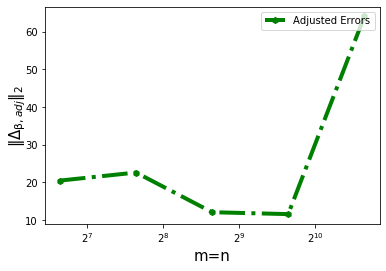

In [64]:
font_y = {"size": 15, "va":"baseline"}
font_x = {"size": 15}
# plot AjMNAR for logistic and Linear
plt.xlabel("m=n", font_x)
plt.ylabel(r"$\Vert\Delta_{\mathrm{\beta}, adj}\Vert_2$", font_y)
plt.xscale("log", basex=2)
plt.plot(ms, adjErrBs, "g-.h", label="Adjusted Errors", linewidth=4)
plt.legend(loc=1)

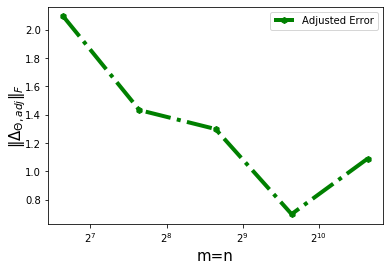

In [66]:
plt.xlabel("m=n", font_x)
#plt.ylim([1.4, 2.1]) #for p=200 linear
plt.ylabel(r"$\Vert\Delta_{\mathrm{\Theta}, adj}\Vert_F$", font_y)
plt.plot(ms, adjErrTs, "g-.h", label="Adjusted Error", linewidth=4)
plt.xscale("log", basex=2)
plt.legend(loc=1)